In [1]:
from bucket_model import BucketModel
from bucket_model_optimizer import BucketModelOptimizer
from data_processing import preprocess_data, train_validate_split

from bucket_model_plotter import plot_water_balance, plot_Q_Q, plot_ECDF, plot_KDE, plot_monthly_boxplot, plot_timeseries

import pandas as pd

In [2]:
path_to_file = '/Users/cooper/Desktop/bucket-model/data/GSTEIGmeteo.txt'
output_destination = '/Users/cooper/Desktop/bucket-model/data/GSTEIGmeteo.csv'
catchment_area = 384.2 # km^2

data = preprocess_data(path_to_file=path_to_file, catchment_area=catchment_area)
train_data, validate_data = train_validate_split(data, train_size=0.8)


train_data

,day,P_mix,T_max,T_min,Q
date,,,,,
1986-01-01,1,2.5,-2.5,-11.6,0.512733
1986-01-02,2,0.2,2.6,-10.7,0.537470
1986-01-03,3,4.3,2.2,-5.3,0.532972
1986-01-04,4,3.4,-4.0,-12.9,0.526226
1986-01-05,5,3.6,1.9,-13.3,0.526226
...,...,...,...,...,...
1997-10-14,287,1.4,0.4,-3.1,2.945966
1997-10-15,288,2.2,2.4,-3.4,2.428735
1997-10-16,289,0.7,5.3,1.0,2.428735


In [3]:
# Initialize the BucketModel with initial parameter guesses
bucket = BucketModel(k=0.5, S_max=20, fr=0.14, rg=15.15, gauge_adj=0.05)  # 5% gauge adjustment
bucket.set_catchment_properties(0.5/100, 1638, 2035, 0, 46.9)

# Initialize the BucketModelOptimizer with the BucketModel instance and observed data
optimizer = BucketModelOptimizer(model=bucket, training_data=train_data)

# Optionally, set additional optimization options, like optimization method, parameter bounds, etc.
optimizer.set_options(method='local', bounds={'k': (0.1, 1), 'S_max': (10, 50), 'fr': (0.1, 0.3), 'rg': (10, 20), 'gauge_adj': (0, 0.1)})

In [4]:
# Run the optimization to calibrate the model parameters
calibrated_parameters = optimizer.calibrate()

In [5]:
calibrated_parameters

{'k': 0.78, 'S_max': 26.33, 'fr': 0.12, 'rg': 18.89, 'gauge_adj': 0.1}

In [6]:
bucket.update_parameters(parameters=calibrated_parameters)
bucket

BucketModel(k=0.78, S_max=26.33, fr=0.12, rg=18.89, gauge_adj=0.1)

In [7]:
results = bucket.run(data)

In [8]:
results

,ET,Q_s,Q_gw,Snow_accum,S,S_gw,Snow_melt,Rain,Snow,Precip
date,,,,,,,,,,
1986-01-01,0.172572,0.0000,2.202370,15.096294,26.158750,39.400393,0.0,0.000000,2.750000,2.75
1986-01-02,0.214713,0.0000,2.085780,15.306121,25.954210,37.314613,0.0,0.010173,0.209827,0.22
1986-01-03,0.256057,0.0000,1.975363,19.900527,25.833746,35.339249,0.0,0.135593,4.594407,4.73
1986-01-04,0.154083,0.0000,1.870791,23.640527,25.679663,33.468458,0.0,0.000000,3.740000,3.74
1986-01-05,0.189004,0.0000,1.771755,27.600527,25.490659,31.696703,0.0,0.000000,3.960000,3.96
...,...,...,...,...,...,...,...,...,...,...
2000-09-26,1.010065,0.0000,3.440143,0.000000,21.792088,61.544157,0.0,0.000000,0.000000,0.00
2000-09-27,0.919765,0.0000,3.258028,0.000000,20.872323,58.286128,0.0,0.000000,0.000000,0.00
2000-09-28,0.850082,0.0000,3.085555,0.000000,20.022241,55.200574,0.0,0.000000,0.000000,0.00


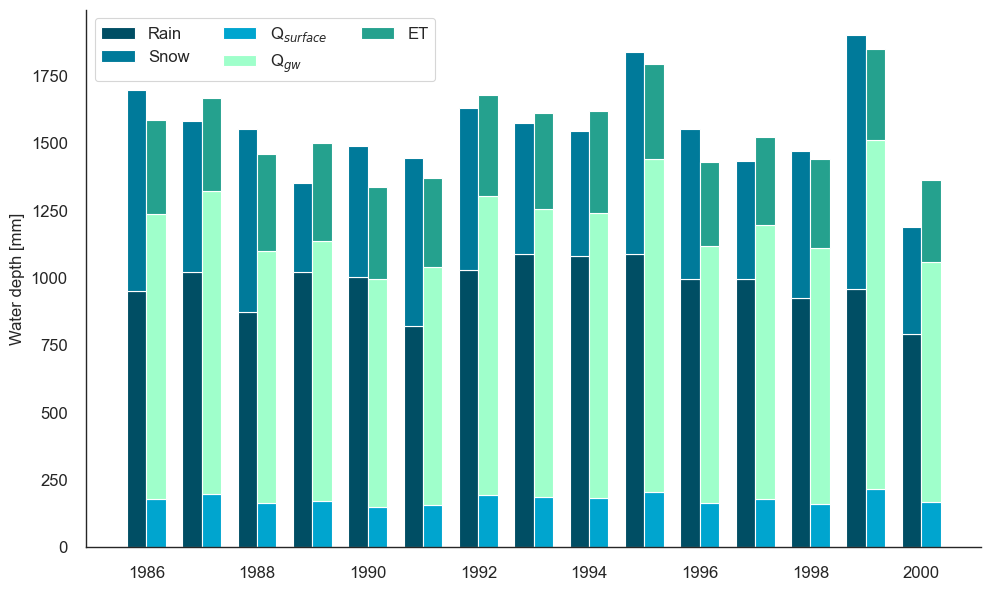

In [9]:
plot_water_balance(results)


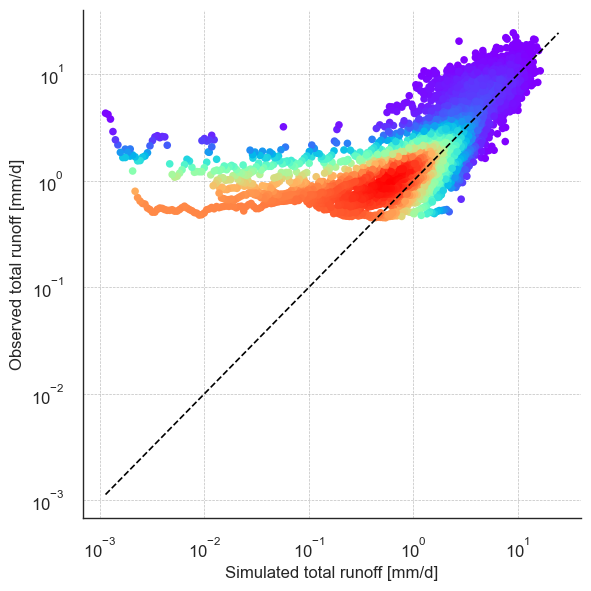

In [10]:
plot_Q_Q(results=results, observed=data, kde=True)

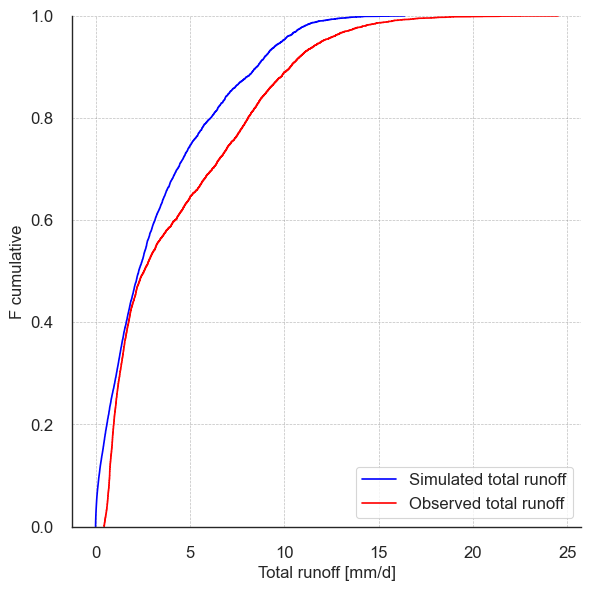

In [11]:
plot_ECDF(results=results, observed=data, palette=['blue', 'red'])

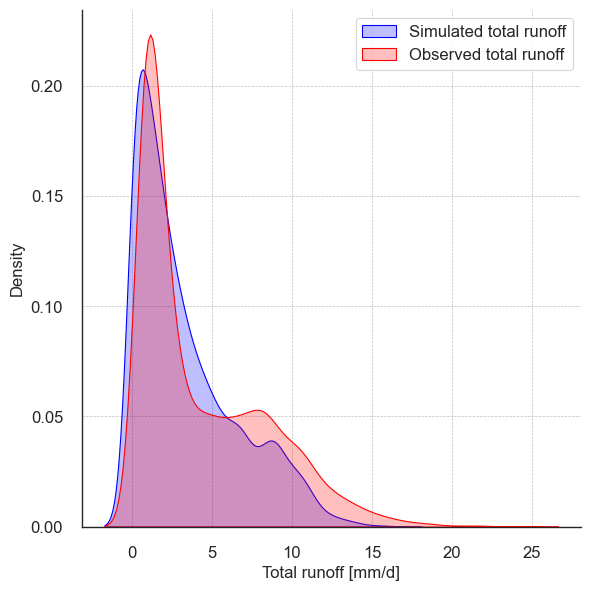

In [12]:
plot_KDE(results=results, observed=data, palette=['blue', 'red'])

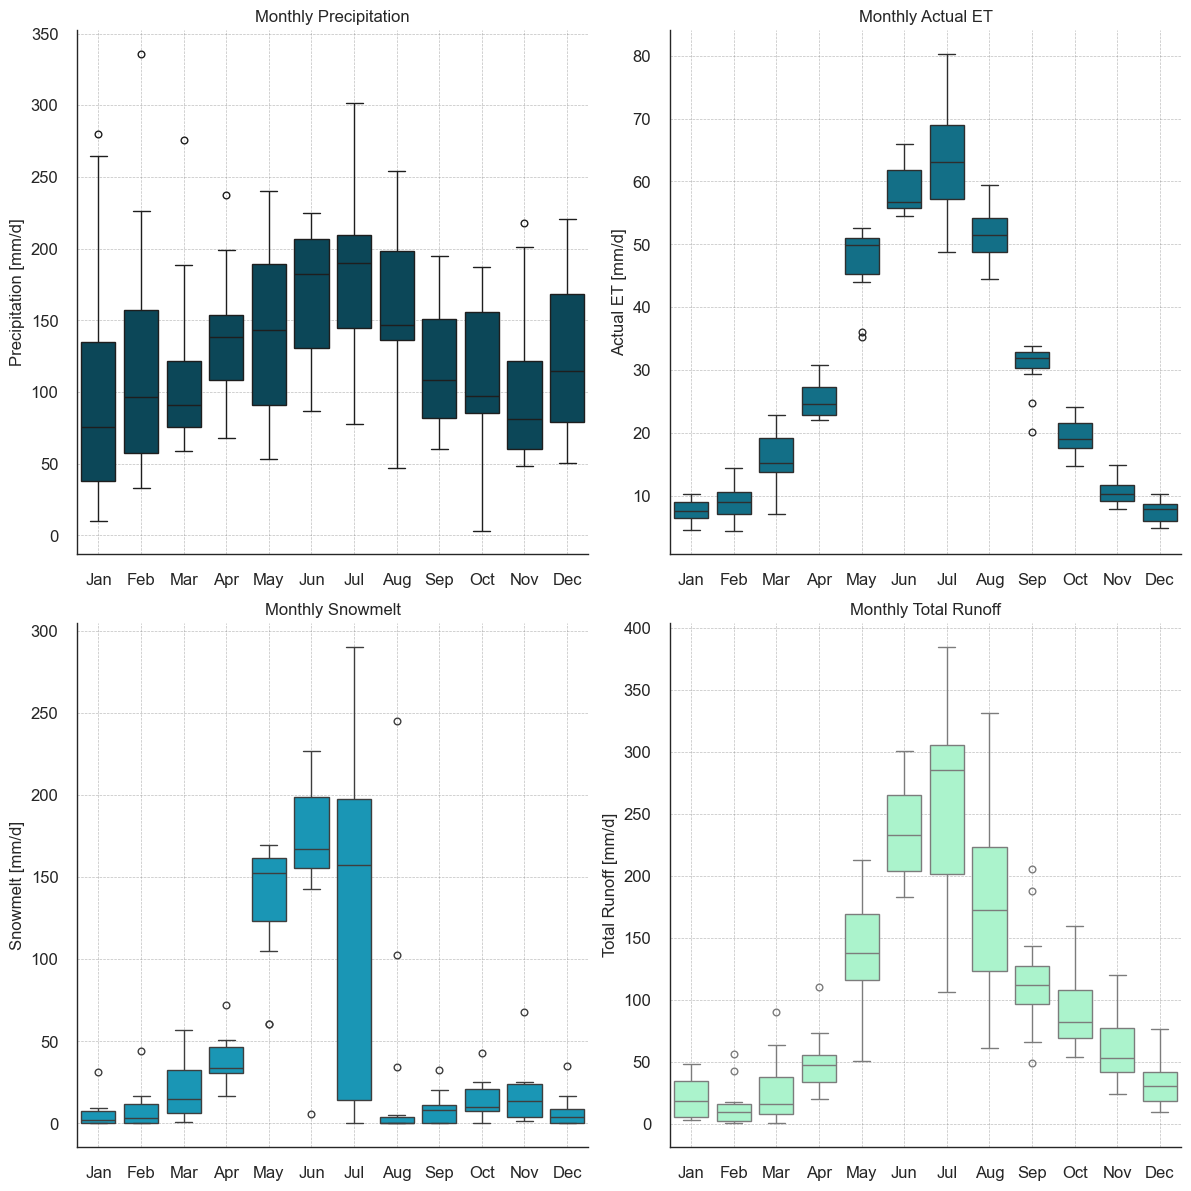

In [13]:
plot_monthly_boxplot(results=results)

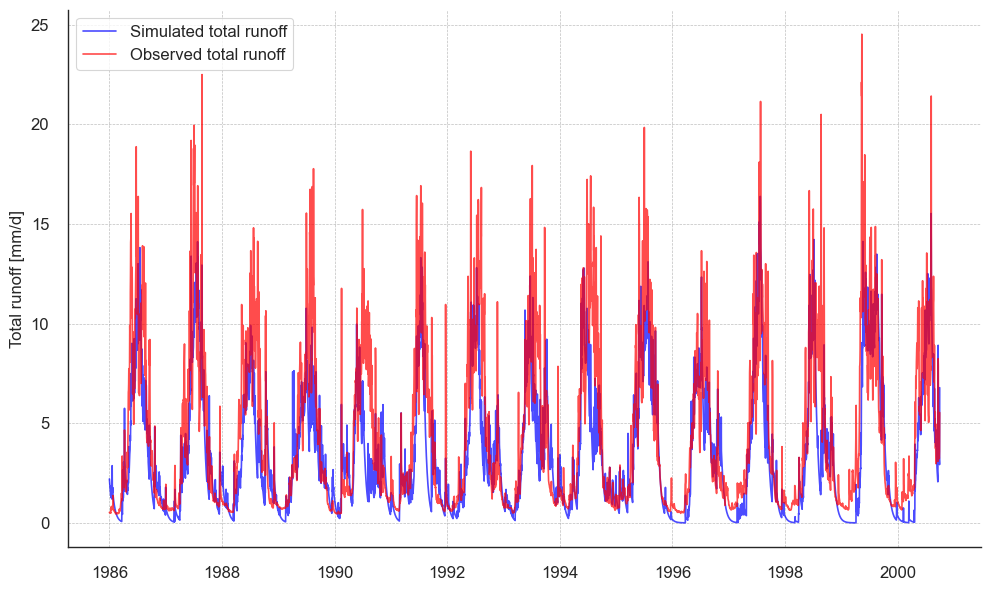

In [17]:
plot_timeseries(results=results, observed=data, start_year='1986', end_year='2000', palette=['blue', 'red'])

/Users/cooper/Desktop/bucket-model/bucket_model_plotter.py:342: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  results_filtered = results_filtered.resample('M').sum()
/Users/cooper/Desktop/bucket-model/bucket_model_plotter.py:343: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observed_filtered = observed_filtered.resample('M').sum()


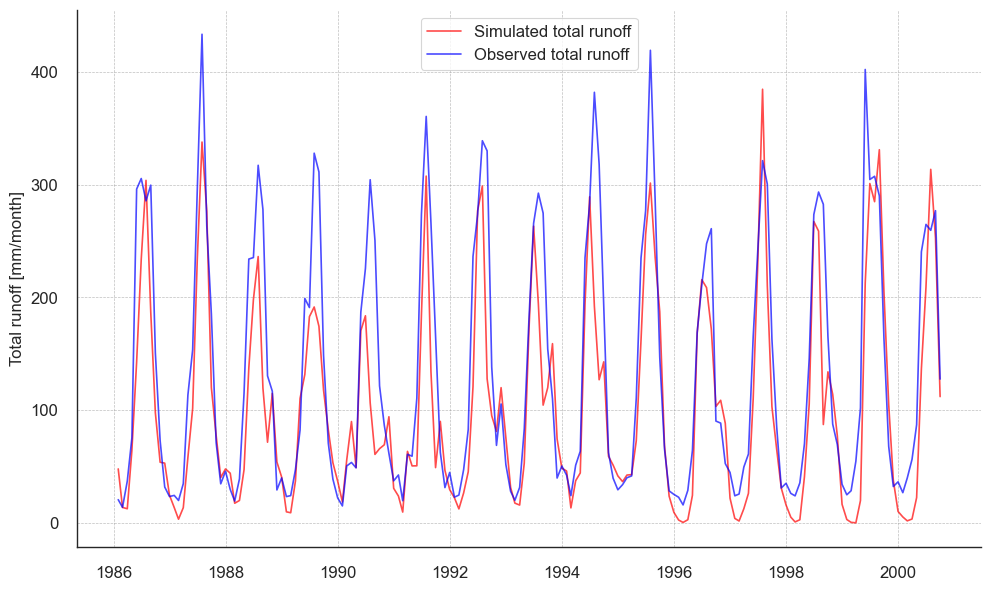

In [18]:
plot_timeseries(results=results, observed=data, start_year='1986', end_year='2000', monthly=True, palette=['red', 'blue'])